In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
# number density in liquid argon
nlar = 2.11e22

In [4]:
import pandas as pd

In [5]:
from scipy.optimize import curve_fit

In [6]:
VARS = ['time','x','y','z','ke','vd','angle','dist','interaction','ioni']

In [20]:
df_v = []

KV = 15000

for n in range(1,10):
    #df_v.append( pd.read_csv('lar-diffusion/%i/%iV_%i.txt'%(KV,KV,n),names=VARS) )
    #df_v.append( pd.read_csv('gas-vdrift/2PSI/v4/%i/%iV_%i.txt'%(KV,KV,n),names=VARS) )
    df_v.append( pd.read_csv('driftvel/%i/%iV_%i.txt'%(KV,KV,n),names=VARS) )
    #df_v.append( pd.read_csv('simulation-runs/%iV_%i.txt'%(KV,n),names=VARS) )

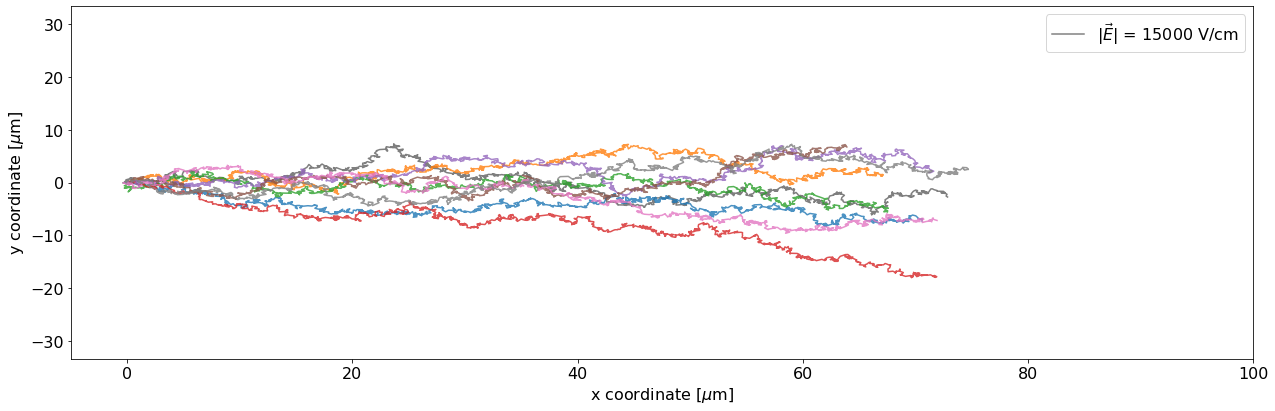

In [21]:
#fig = plt.figure(figsize=(18,6))
#for df in df_v:
#    plt.scatter(df['x'],np.sqrt(df['y']**2+df['z']**2),marker='.',edgecolor=None,linewidth=None,s=1)
#plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
#plt.ylabel('$\sqrt{x^2+y^2}$ [$\mu$m]',fontsize=16)
#plt.show()

DMAX = 100
WMAX = DMAX*(6./18.)

fig = plt.figure(figsize=(18,6))
for i,df in enumerate(df_v):
    if (i==0):
        plt.plot(df['x'],df['y'],'-',alpha=0.5,label='$|\\vec{E}|$ = %.0f V/cm'%(KV),color='k')
    else:
        plt.plot(df['x'],df['y'],'-',alpha=0.8)
plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
plt.ylabel('y coordinate [$\mu$m]',fontsize=16)
plt.xlim([-5,DMAX])
plt.legend(loc=1)
plt.ylim([-WMAX,WMAX])
plt.tight_layout()
#plt.savefig('plots/trajectories_%ikv.pdf'%(KV/1000))
plt.show()

#fig = plt.figure(figsize=(6,6))
#plt.scatter(df['x'],df['z'],marker='.',edgecolor=None,linewidth=None,s=1)#,bins=BINS2D,norm=LogNorm())
#plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
#plt.ylabel('z coordinate [$\mu$m]',fontsize=16)
#plt.show()

In [ ]:
fig = plt.figure(figsize=(18,6))
for i,df in enumerate(df_v):
    if (i==0):
        plt.plot(df['time'],df['ke'],'-',alpha=0.5,label='$|\\vec{E}|$ = %.0f V/cm'%(KV),color='k')
    else:
        plt.plot(df['time'],df['ke'],'-',alpha=0.8)
plt.xlabel('time [ns]',fontsize=16)
plt.ylabel('energy [eV]',fontsize=16)
#plt.xlim([-5,DMAX])
plt.legend(loc=1)
plt.yscale('log')
#plt.ylim([-WMAX,WMAX])
plt.tight_layout()
#plt.savefig('plots/trajectories_%ikv.pdf'%(KV/1000))
plt.show()

fig = plt.figure(figsize=(18,6))
for i,df in enumerate(df_v):
    if (i==0):
        plt.plot(df['time'],df['x'],'-',alpha=0.5,label='$|\\vec{E}|$ = %.0f V/cm'%(KV),color='k')
    else:
        plt.plot(df['time'],df['x'],'-',alpha=0.8)
plt.xlabel('time [ns]',fontsize=16)
plt.ylabel('x coordinate [um]',fontsize=16)
#plt.xlim([-5,DMAX])
plt.legend(loc=1)
#plt.yscale('log')
#plt.ylim([-WMAX,WMAX])
plt.tight_layout()
#plt.savefig('plots/trajectories_%ikv.pdf'%(KV/1000))
plt.show()

In [ ]:
time_v = np.linspace(0.,5.,100)

ke_avg_v = []

for i, KE in enumerate(KE_v):

    this_ke_avg_v = []
    this_df_v = df_v[i]
    
    for time in time_v:
        
        print ('time is : ',time)
        ke_v = []
        for n in range(100):
            dfsub = (this_df_v[n]).query('time > %f'%time)
            ke = dfsub['ke'].iloc[0]
            ke_v.append(ke)
        ke_v = np.array(ke_v)
        ke_mean = np.mean(ke_v)
        this_ke_avg_v.append(ke_mean)
        
    ke_avg_v.append(this_ke_avg_v)

In [ ]:
THERMAL = 1.5*7.74e-3

fig = plt.figure(figsize=(8,6))
#BINS2D = (np.linspace(0,1,100),np.linspace(0,20,50))
for i, KE in enumerate(KE_v):
    plt.scatter(time_v,ke_avg_v[i],marker='o',s=20,label='initial KE : %.02f eV'%KE)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('time [ns]',fontsize=16)
plt.ylabel('electron energy [eV]',fontsize=16)
plt.hlines(THERMAL,0,5,label='3/2 $k_b$ T',color='k',linestyle='--')

#df2ns = df.query('time < 2')
#popt,popv = curve_fit(expo,df2ns['time'].values,df2ns['ke'].values,p0=[1e-1,1,THERMAL],\
#                     bounds=([1e-2,0.9,THERMAL/2],[10,1.1,THERMAL*2]))
#plt.plot(df['time'].values,expo(df['time'].values,*popt),'r--',lw=2)
#print (popt)

#plt.ylim([0,THERMAL*4])
#plt.xlim([0,5])
#plt.legend(fontsize=16)
#plt.xlim([0,5])
#plt.ylim(0,0.2)
plt.legend()
plt.xlim([0,3.5])
plt.ylim([3e-3,20])#100*THERMAL])
plt.yscale('log')
#plt.xscale('log')
#plt.ylim(0.005,0.0065)
plt.tight_layout()
plt.savefig('plots/thermalization.pdf',dpi=250)
plt.show()

In [ ]:
#df = pd.read_csv('thermalization/0V_1p0eV.txt',names=VARS)

In [ ]:
print (df.shape)

In [ ]:
# x and l in meters
def expo(x,A,l):
    return A*np.exp(-x/l)

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.hist(df['ke'].values,histtype='step',lw=2,bins=np.linspace(0,20,100))
#plt.yscale('log')
#plt.xscale('log')
plt.xlim([1e-3,20])
plt.xlabel('electron energy [eV]')
plt.grid()
plt.show()

fig = plt.figure(figsize=(6,6))
plt.hist(df['ioni'].values,histtype='step',lw=2,bins=np.linspace(0,10,11))
plt.yscale('log')
#plt.xscale('log')
#plt.xlim([1e-3,20])
plt.ylim([1e-1,1e5])
plt.xlabel('ionizations')
plt.grid()
plt.show()

XVALS = np.linspace(0,1e-9,20)
fig = plt.figure(figsize=(6,6))
n,bins,patches = plt.hist(df['dist'].values,histtype='step',lw=2,bins=XVALS)#,density=True)
bc = .5*(bins[1:]+bins[:-1])
#plt.plot(XVALS,n[0]*expo(XVALS,(1e-2)/(nlar*XSEC_en_mag_v[10])),'r--')
popt,popv = curve_fit(expo,bc,n,p0=[n[0],1e-8])
plt.plot(bc,expo(bc,*popt),label='$\lambda$ = %.g'%popt[1])
plt.yscale('log')
plt.xlabel('distance between interactions [m]',fontsize=14)
#plt.ylim([1,1e4])
plt.legend(loc=1)
plt.grid()
plt.show()

In [ ]:
BINSANGLE = np.linspace(0,179,20)#180)

In [ ]:
df01 = df.query('ke > 0 and ke < 1')
df12 = df.query('ke > 1 and ke < 2')
df25 = df.query('ke > 2 and ke < 5')

In [ ]:
fig = plt.figure(figsize=(6,6))
#plt.plot(BINS,theory,label='theoretical xsec')
plt.hist(df01['angle'],bins=BINSANGLE,histtype='step',lw=2,density=True)
plt.hist(df12['angle'],bins=BINSANGLE,histtype='step',lw=2,density=True)
plt.hist(df25['angle'],bins=BINSANGLE,histtype='step',lw=2,density=True)
#plt.hist(df['angle'],bins=BINSANGLE,histtype='step',lw=2,density=True)
plt.xlabel('scattering angle',fontsize=16)
plt.ylabel('relative xsec',fontsize=16)
plt.legend(fontsize=16)
#plt.ylim(0.005,0.0065)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
plt.hist(df['ioni'],bins=np.linspace(0,2,3),histtype='step',lw=2,density=True)
plt.xlabel('scattering angle',fontsize=16)
plt.ylabel('relative xsec',fontsize=16)
plt.legend(fontsize=16)
plt.yscale('log')
#plt.ylim(0.005,0.0065)
plt.show()

In [ ]:
from matplotlib.colors import LogNorm

In [ ]:
fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(0,20,50),BINSANGLE)
plt.hist2d(df['ke'],df['angle'],bins=BINS2D)#,norm=LogNorm())
#plt.xlabel('scattering angle',fontsize=16)
#plt.ylabel('relative xsec',fontsize=16)
plt.legend(fontsize=16)
#plt.ylim(0.005,0.0065)
plt.show()

In [ ]:
print (df['time'])

In [ ]:
def expo(x,t,A,b):
    return b + A*np.exp(-x/t)

In [ ]:
fig = plt.figure(figsize=(6,6))
#BINS2D = (np.linspace(0,1,100),np.linspace(0,20,50))
plt.scatter(df['time'],df['ioni'],marker='.',s=1)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('time [ns]',fontsize=16)
plt.ylabel('ionizations [#]',fontsize=16)
plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(0,1,100),np.linspace(0,3,50))
plt.scatter(df['time'],df['vd'],marker='.',s=1)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('vd',fontsize=16)
plt.ylabel('electron energy [eV]',fontsize=16)
plt.hlines(1.5*7.74e-3,0,10,label='3/2 $k_b$ T',color='k',linestyle='--')
#plt.legend(fontsize=16)
#plt.xlim([0,5])
#plt.ylim(0,0.2)
plt.legend()
#plt.ylim(0.005,0.0065)
plt.show()

In [ ]:
dfsub = df.query('angle >= 0')
print (float(dfsub.shape[0])/float(df.shape[0]))

In [ ]:
fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(-1,1,100),np.linspace(0,1,50))
plt.scatter(df['x'],np.sqrt(df['y']**2+df['z']**2),marker='.',edgecolor=None,linewidth=None,s=1)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
plt.ylabel('$\sqrt{x^2+y^2}$ [$\mu$m]',fontsize=16)
plt.show()

fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(-1,1,100),np.linspace(0,1,50))
plt.scatter(df['x'],df['y'],marker='.',edgecolor=None,linewidth=None,s=1)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
plt.ylabel('y coordinate [$\mu$m]',fontsize=16)
plt.show()

fig = plt.figure(figsize=(6,6))
BINS2D = (np.linspace(-1,1,100),np.linspace(0,1,50))
plt.scatter(df['x'],df['z'],marker='.',edgecolor=None,linewidth=None,s=1)#,bins=BINS2D,norm=LogNorm())
plt.xlabel('x coordinate [$\mu$m]',fontsize=16)
plt.ylabel('z coordinate [$\mu$m]',fontsize=16)
plt.show()